# 2. Make a detailed notebook containing all the statistical operations and form various kinds of plots depicting the data or the business focused on.

In [411]:
import nltk
import csv
from nltk.corpus import stopwords
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter
import numpy as np
%matplotlib inline


In [412]:
df = pd.read_csv('reviews.csv')

In [413]:
df.head(20)

,Unnamed: 0,User_name,Review title,Review Rating,Review date,Review_body
0,0,Leofwine_draca,A new TV classic,10/10,9 October 2021,"Just finished up SQUID GAME, the Korean TV sho..."
1,1,kosmasp,Just a game,9/10,10 October 2021,"Well multiple games actually, but even that yo..."
2,2,Tweekums,Games to die for,10/10,11 October 2021,This runaway hit from South Korea is centred o...
3,3,FeastMode,"if you think this is good, PLEASE watch the ko...",5/10,9 October 2021,I went into this show knowing absolutely nothi...
4,4,Irishchatter,It started off strong but ended disoriented,7/10,8 October 2021,I honestly don't know wtf the main character n...
5,5,Edvis-1997,8,8/10,4 October 2021,I loved it but three last episodes killed the ...
6,6,John6Daniels,This puts a smile on my face.,1/10,15 October 2021,"Haha! I don't know if it's Korea, trolls, fanb..."
7,7,RosanaBotafogo,"Perfect, Beautiful and lovely...",10/10,12 October 2021,"Ep1 wonderful drama that we love, protagonist ..."
8,8,billcr12,Addicting,8/10,14 October 2021,A great concept here as desperate people with ...
9,9,alindsay-al,A Fantastic truly unique show,9/10,10 October 2021,So Squid Game has taken over the world these l...


## Checking for Null

In [414]:
df.isnull().sum()

Unnamed: 0       0
User_name        0
Review title     0
Review Rating    0
Review date      0
Review_body      0
dtype: int64

## Summary statistics

In [415]:
df.describe()

,Unnamed: 0
count,1185.000000
mean,592.000000
std,342.224342
min,0.000000
25%,296.000000
50%,592.000000
75%,888.000000
max,1184.000000


In [416]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'how', "you've", 'it', 'were', "you're", 'is', 'both', 'll', "couldn't", "haven't", 'wasn', 'of', 'having', 'during', 'between', 'own', 'very', 'these', 'in', 'ours', 'theirs', 'was', 'what', 'had', "weren't", 'him', 'nor', 'aren', 'you', 'that', 'itself', "hadn't", 'only', 'why', 'myself', 'but', 'here', 'haven', 'couldn', 'shouldn', 'ma', 'hasn', "won't", 'further', 'my', 't', 'mightn', "doesn't", 'be', 'can', 'an', 'he', 'under', 'o', 'been', 'have', 'herself', 'there', 'more', "shouldn't", "mightn't", 'ain', 'themselves', 'himself', 'other', 'from', "wouldn't", 'yourself', 'out', "wasn't", 'm', 'shan', 'we', 'ourselves', 's', 'as', 'by', "don't", 'hers', 'above', 'again', 'not', 'i', 'me', 'over', 'who', 'before', 'they', 'then', 'up', 'after', 'into', 'are', 'a', 'most', 'no', "that'll", "needn't", "you'd", 'our', 'than', 'don', 'if', 'didn', 'few', 'did', 'hadn', "it's", 'your', 'too', 'yours', 'because', 'off', 'their', 'such', 'for', 'yourselves', 'or', 'to', 'and', 'down', 't

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


In [417]:
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# 1. Use regex to remove stop words.

# Removing Stopwords

In [418]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    text = re.sub(r'[!\'.,]','',text)
    
    return text

In [419]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

# 3. Create pipeline, remove stop words, word frequency analysis and word clouds

In [420]:
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:tokens = fun(tokens)
    return tokens
df['tokens'] = df['Review_body'].apply(prepare, pipeline=pipeline)

In [421]:
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
helpful,2152
found,1142
review,1101
vote,1092
sign,1079
permalink,1076
show,904
game,709
series,675


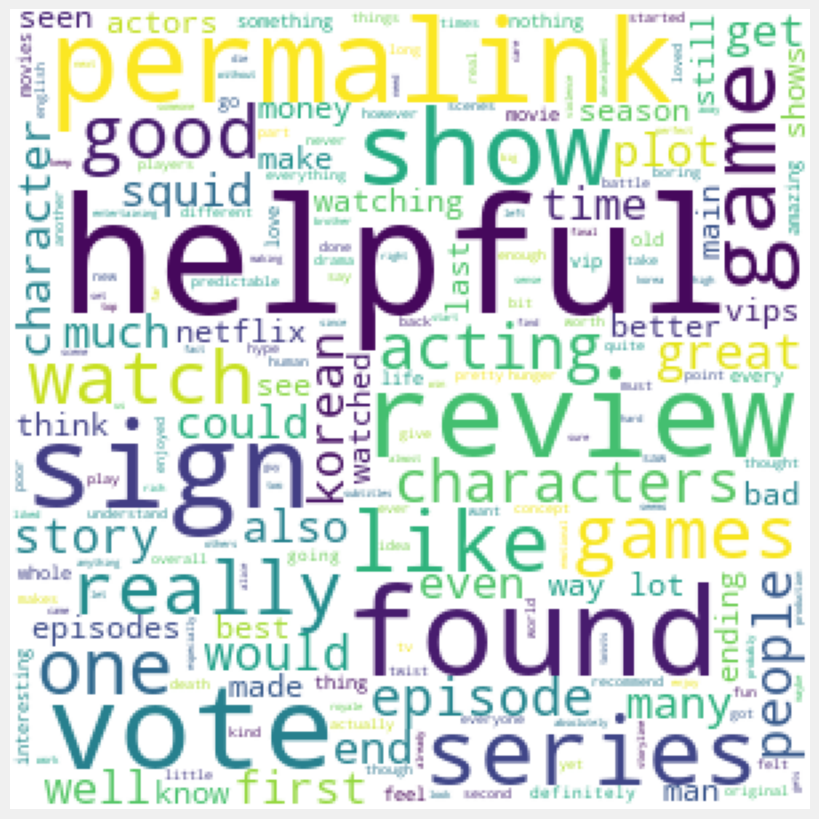

In [422]:
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [423]:
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    counter = Counter()
    df[column].map(update)# create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

## Word Freq

In [424]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
helpful,2152,422.851457
found,1142,211.728657
review,1101,212.252689
vote,1092,214.569606
sign,1079,212.015206


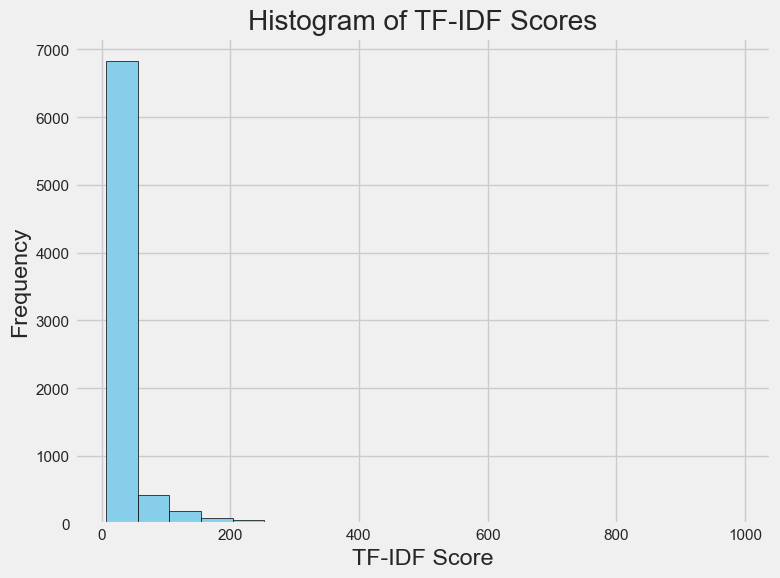

In [425]:
# Assuming freq_df is your DataFrame with columns 'word', 'freq', and 'tfidf'
# Plotting a histogram for the 'tfidf' column
plt.figure(figsize=(8, 6))
plt.hist(freq_df['tfidf'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of TF-IDF Scores')
plt.xlabel('TF-IDF Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


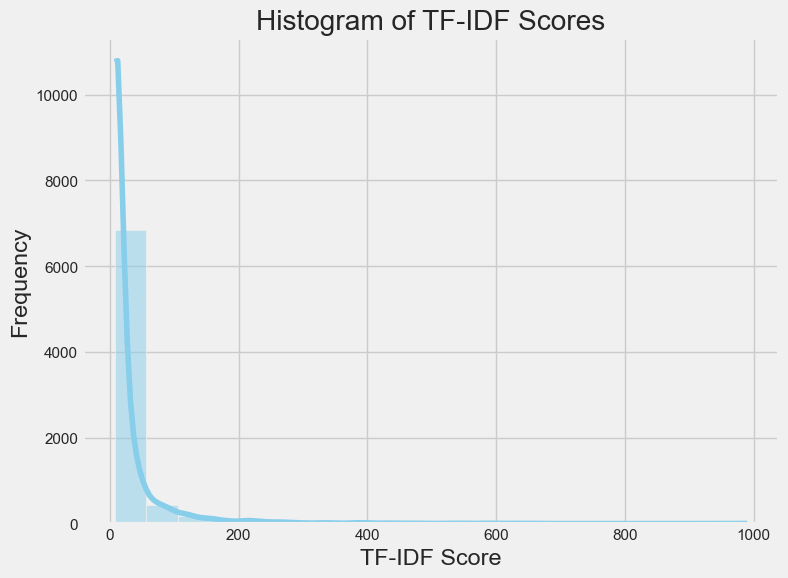

In [426]:
# Assuming freq_df is your DataFrame with columns 'word', 'freq', and 'tfidf'
# Plotting a histogram for the 'tfidf' column
plt.figure(figsize=(8, 6))
sns.histplot(freq_df['tfidf'], bins=20, color='skyblue', kde=True)
plt.title('Histogram of TF-IDF Scores')
plt.xlabel('TF-IDF Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [427]:
df['length']=df['Review_body'].str.len()
df.describe()

,Unnamed: 0,length
count,1185.000000,1185.000000
mean,592.000000,755.807595
std,342.224342,696.735505
min,0.000000,294.000000
25%,296.000000,412.000000
50%,592.000000,568.000000
75%,888.000000,839.000000
max,1184.000000,9889.000000


<Axes: ylabel='Frequency'>

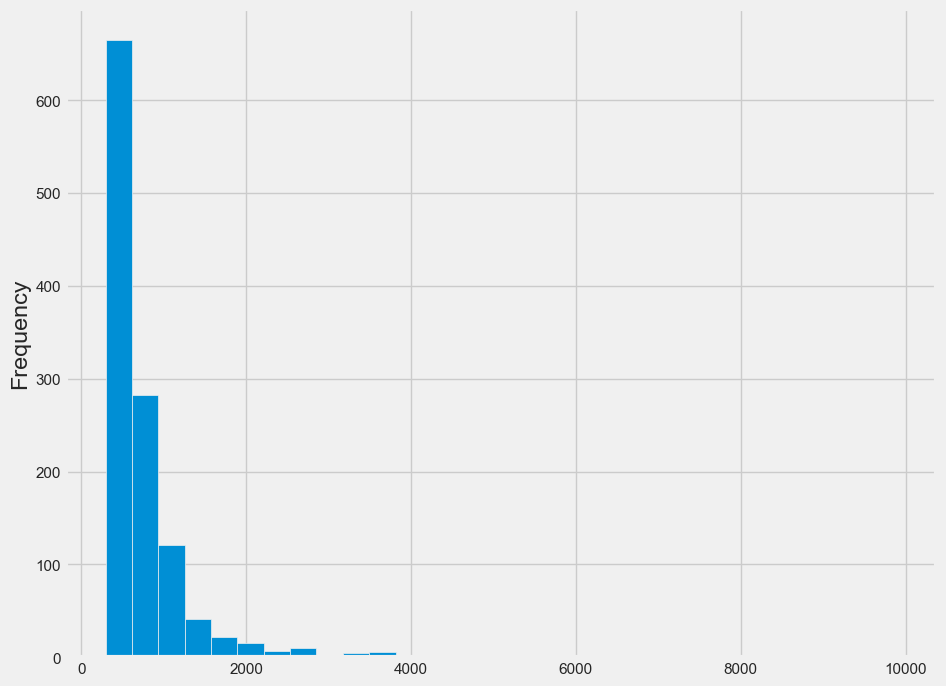

In [428]:
df['length'].plot(kind='hist', bins=30)

<Axes: >

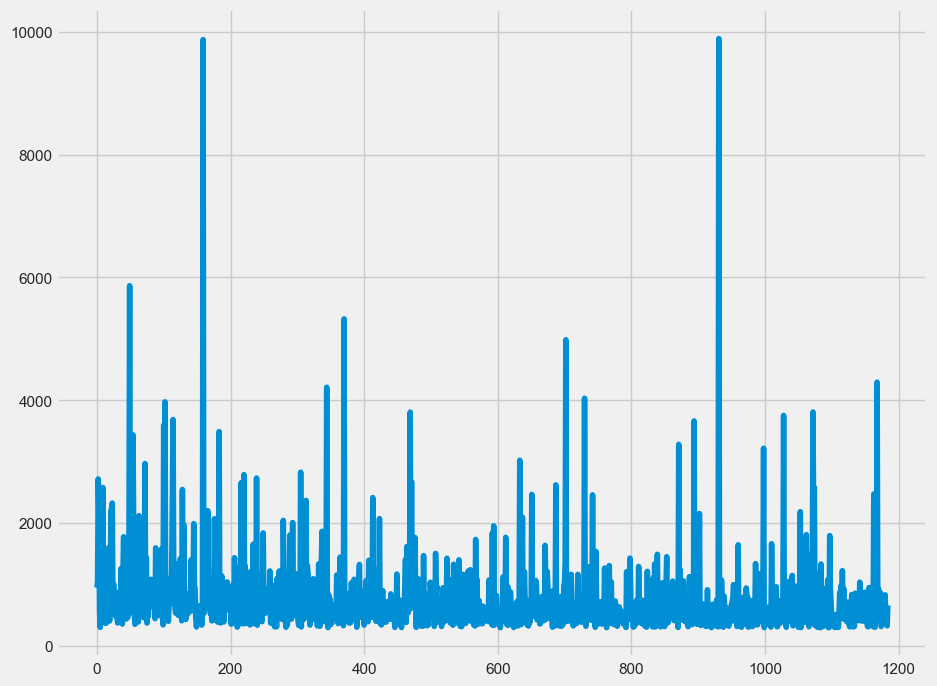

In [429]:
df['length'].plot()

<Axes: >

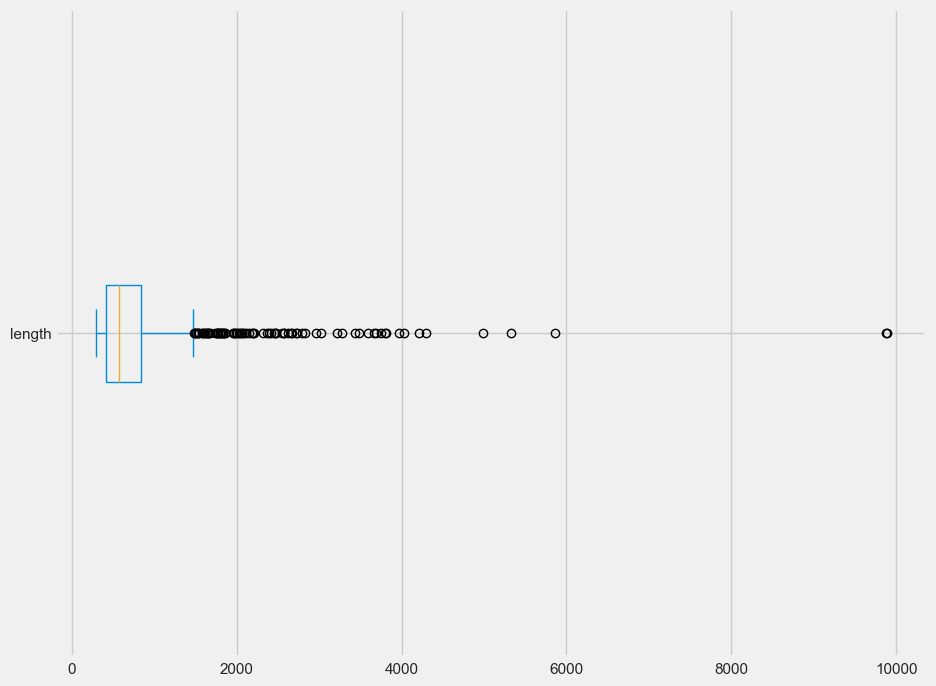

In [430]:
df['length'].plot(kind='box', vert=False)

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

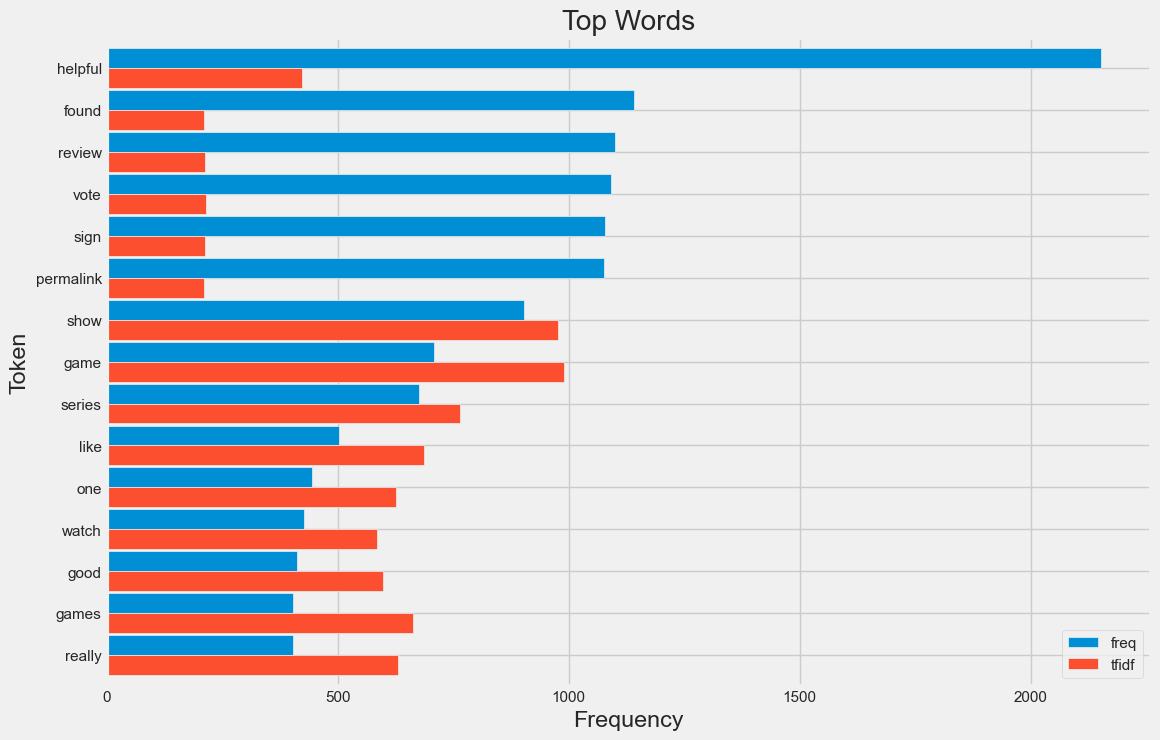

In [431]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

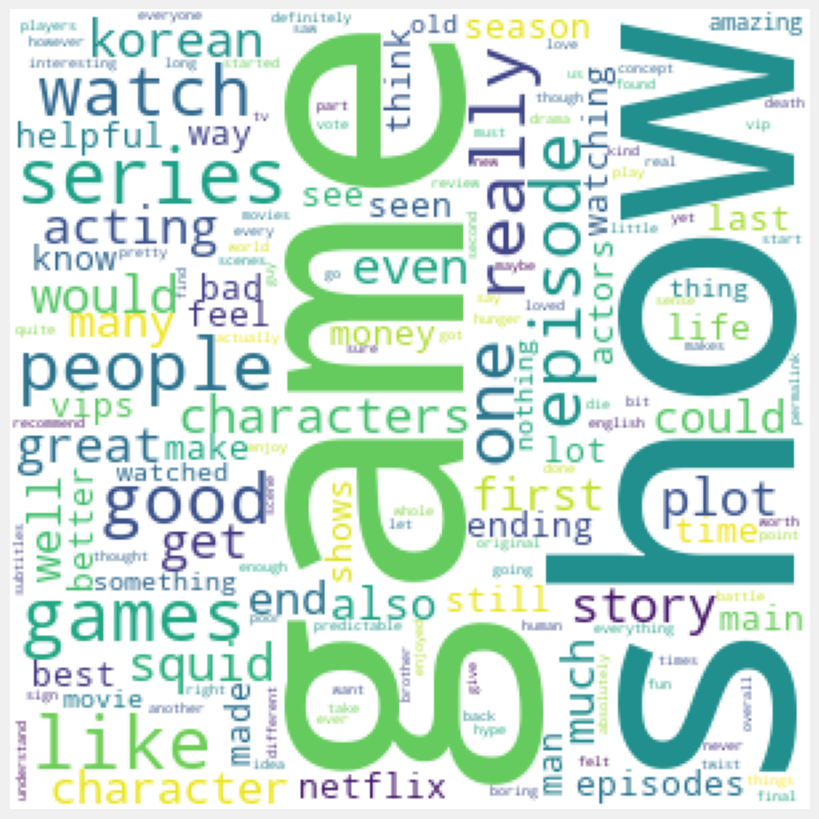

In [432]:
wc = WordCloud(background_color='white', width = 300, height=300,margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [433]:
df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [434]:
def count_keywords_by(df, by, keywords, column='tokens'):
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps inthe index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix,columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    return freq_df.groupby(by=by).sum().sort_values(by)

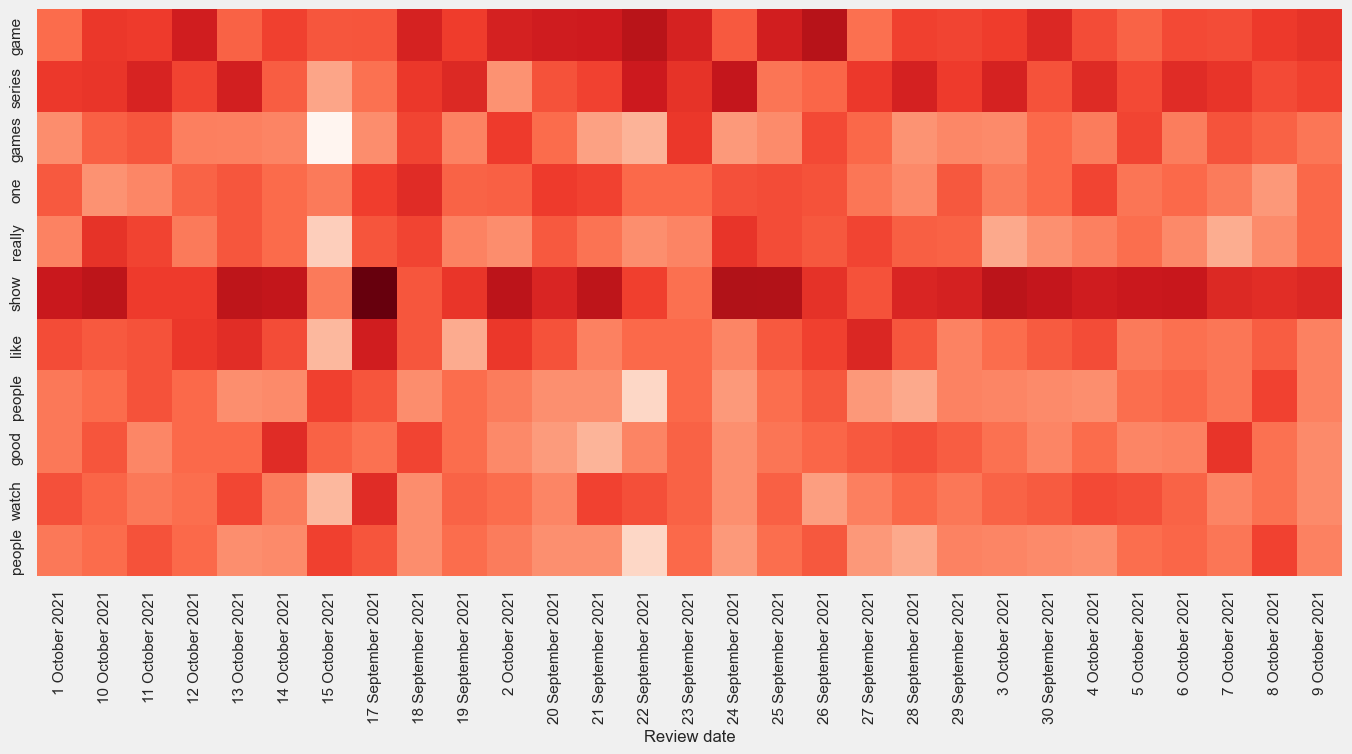

In [435]:
keywords = ['game','series','games','one','really','show','like','people','good','watch','people']
freq_df = count_keywords_by(df, by='Review date', keywords=keywords)
freq_df = freq_df.div(df.groupby('Review date')['num_tokens'].sum(), axis=0)
freq_df = freq_df.apply(np.sqrt)
# Plotting the heatmap
plt.figure(figsize=(15, 7))
sns.set(font_scale=1)
sns.heatmap(data=freq_df.T,xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)

## 4. Sentimental Analysis of Reviews

In [436]:
from textblob import TextBlob

In [437]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
df['Subjectivity'] = df['Review_body'].apply(getSubjectivity)
df['Polarity'] = df['Review_body'].apply(getPolarity)

#Now display data
df.head()

,Unnamed: 0,User_name,Review title,Review Rating,Review date,Review_body,tokens,length,num_tokens,Subjectivity,Polarity
0,0,Leofwine_draca,A new TV classic,10/10,9 October 2021,"Just finished up SQUID GAME, the Korean TV sho...","[finished, squid, game, korean, tv, show, beco...",947,71,0.550000,-0.009375
1,1,kosmasp,Just a game,9/10,10 October 2021,"Well multiple games actually, but even that yo...","[well, multiple, games, actually, even, may, f...",1049,73,0.418651,0.237169
2,2,Tweekums,Games to die for,10/10,11 October 2021,This runaway hit from South Korea is centred o...,"[runaway, hit, south, korea, centred, seong, g...",2716,223,0.498397,0.151283
3,3,FeastMode,"if you think this is good, PLEASE watch the ko...",5/10,9 October 2021,I went into this show knowing absolutely nothi...,"[went, show, knowing, absolutely, nothing, kor...",2027,179,0.569573,0.061566
4,4,Irishchatter,It started off strong but ended disoriented,7/10,8 October 2021,I honestly don't know wtf the main character n...,"[honestly, know, wtf, main, character, needed,...",551,30,0.505556,0.177778


In [438]:
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
df["Insight"] = df["Polarity"].apply(getInsight)

df.head(50)

,Unnamed: 0,User_name,Review title,Review Rating,Review date,Review_body,tokens,length,num_tokens,Subjectivity,Polarity,Insight
0,0,Leofwine_draca,A new TV classic,10/10,9 October 2021,"Just finished up SQUID GAME, the Korean TV sho...","[finished, squid, game, korean, tv, show, beco...",947,71,0.550000,-0.009375,Negative
1,1,kosmasp,Just a game,9/10,10 October 2021,"Well multiple games actually, but even that yo...","[well, multiple, games, actually, even, may, f...",1049,73,0.418651,0.237169,Positive
2,2,Tweekums,Games to die for,10/10,11 October 2021,This runaway hit from South Korea is centred o...,"[runaway, hit, south, korea, centred, seong, g...",2716,223,0.498397,0.151283,Positive
3,3,FeastMode,"if you think this is good, PLEASE watch the ko...",5/10,9 October 2021,I went into this show knowing absolutely nothi...,"[went, show, knowing, absolutely, nothing, kor...",2027,179,0.569573,0.061566,Positive
4,4,Irishchatter,It started off strong but ended disoriented,7/10,8 October 2021,I honestly don't know wtf the main character n...,"[honestly, know, wtf, main, character, needed,...",551,30,0.505556,0.177778,Positive
5,5,Edvis-1997,8,8/10,4 October 2021,I loved it but three last episodes killed the ...,"[loved, three, last, episodes, killed, vibe, f...",299,13,0.288889,0.166667,Positive
6,6,John6Daniels,This puts a smile on my face.,1/10,15 October 2021,"Haha! I don't know if it's Korea, trolls, fanb...","[haha, know, korea, trolls, fanboys, sheep, im...",1068,87,0.508824,0.042647,Positive
7,7,RosanaBotafogo,"Perfect, Beautiful and lovely...",10/10,12 October 2021,"Ep1 wonderful drama that we love, protagonist ...","[ep1, wonderful, drama, love, protagonist, dub...",1771,139,0.652862,0.385181,Positive
8,8,billcr12,Addicting,8/10,14 October 2021,A great concept here as desperate people with ...,"[great, concept, desperate, people, financial,...",817,62,0.539333,0.302333,Positive
9,9,alindsay-al,A Fantastic truly unique show,9/10,10 October 2021,So Squid Game has taken over the world these l...,"[squid, game, taken, world, last, weeks, thoug...",2576,225,0.555098,0.203596,Positive


In [439]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

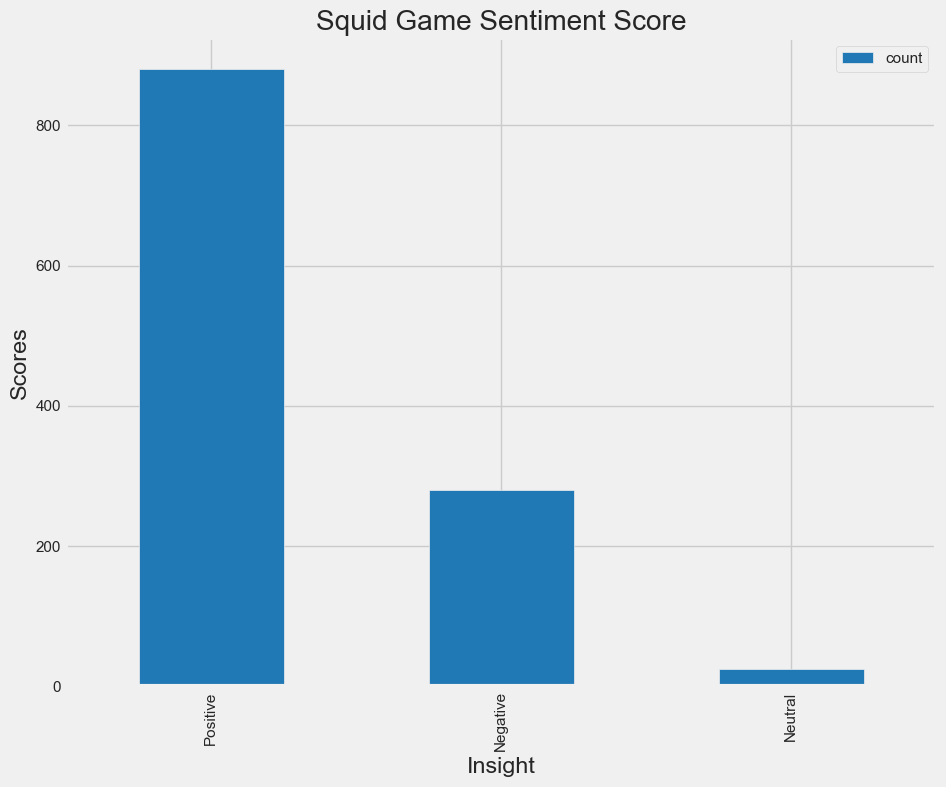

In [442]:
plt.title("Squid Game Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.legend()
plt.show()

# 4. Pick 5 random strings which we will encounter in our day-to-day life as a data scientist and write regex to identify them and sort, provide an example and result of the regex for each string. 

## Regex to find email

In [443]:
import re

string = "Please contact me at john.doe@example.com or jane_doe@example.co.uk"
pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'

emails = re.findall(pattern, string)
print(emails)

['john.doe@example.com', 'jane_doe@example.co.uk']


# Regex to find phone number

In [447]:
phone = "My number is +1 (123) 456-7890"
phone_pattern = r"(\+\d{1,3}\s?)?((\(\d{1,3}\))|\d{1,3})[-.\s]?\d{1,4}[-.\s]?\d{1,4}[-.\s]?\d{1,4}"

phone_match = re.search(phone_pattern, phone)
if phone_match:
    print(phone_match.group(0))

+1 (123) 456-7890


# To find URL

In [451]:
url = "Link is my portfolio is https://www.example.com/path/to/file?query=value#fragment"
url_pattern = r"https?://[\w.-]+[\w/:%&=\?#.\-]+"
url_match = re.search(url_pattern, url)
if url_match:
    print(url_match.group(0))

https://www.example.com/path/to/file?query=value#fragment


# To find Three letter words

In [452]:
# Sample text
text = "This is a sample text with some 3-letter words like cat, dog, and bat."
pattern = r'\b[a-zA-Z]{3}\b'
three_letter_words = re.findall(pattern, text)
print("3-letter words found:", three_letter_words)


3-letter words found: ['cat', 'dog', 'and', 'bat']


# Find words ending with ing

In [453]:
text = "I am singing while walking and coding."
pattern = r'\b\w+ing\b'
ing_words = re.findall(pattern, text)
print("Words ending with 'ing':", ing_words)


Words ending with 'ing': ['singing', 'walking', 'coding']
